#  Import Libraries and Load Data 

In [9]:
#LOAD DATASETS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches_df = pd.read_csv('C:/Users/DELL/OneDrive/Documents/Intern/WorldCupMatches.csv')
players_df = pd.read_csv('C:/Users/DELL/OneDrive/Documents/Intern/WorldCupPlayers.csv')
cups_df  = pd.read_csv('C:/Users/DELL/OneDrive/Documents/Intern/WorldCups.csv')



#  Understand the Data
#Exploring each DataFrame to understand its structure and contents.

In [8]:
# Displaying the first few rows of each DataFrame
print("Matches DataFrame:")
print(matches_df.head())

print("\nPlayers DataFrame:")
print(players_df.head())

print("\nCups DataFrame:")
print(cups_df.head())

# Check the columns and data types
print("\nMatches DataFrame Info:")
print(matches_df.info())

print("\nPlayers DataFrame Info:")
print(players_df.info())

print("\nCups DataFrame Info:")
print(cups_df.info())

Matches DataFrame:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0 

#  Clean and Prepare Data
#Checking for missing values, data types, and any inconsistencies.

In [13]:
# Check for missing values
print(matches_df.isnull().sum())
print(players_df.isnull().sum())
print(cups_df.isnull().sum())

# Example of converting data types if necessary
matches_df['Year'] = pd.to_datetime(matches_df['Year'])


Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attenda

#  Merging data

In [87]:
print("Matches DataFrame columns:", matches_df.columns)
print("Cups DataFrame columns:", cups_df.columns)

# Check data types and first few rows
print("Matches DataFrame columns and types:")
print(matches_df.dtypes)
print(matches_df.head())

print("\nCups DataFrame columns and types:")
print(cups_df.dtypes)
print(cups_df.head())

# Check unique values in 'Year' columns
print("\nUnique values in matches_df 'Year':")
print(matches_df['Year'].unique())

print("\nUnique values in cups_df 'Year':")
print(cups_df['Year'].unique())


Matches DataFrame columns: Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Goal Difference', 'Winning Team', 'Home Win', 'Away Win', 'Draw'],
      dtype='object')
Cups DataFrame columns: Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')
Matches DataFrame columns and types:
Year                             int32
Datetime                datetime64[ns]
Stage                         category
Stadium                         object
City                            object
Home Team Name                  object
Home Team Goals                float64
Away Team Goals                floa

In [83]:
print("Matches DataFrame 'Year' type:", matches_df['Year'].dtype)
print("Cups DataFrame 'Year' type:", cups_df['Year'].dtype)


# Convert 'Year' in matches_df to integer if it's datetime
if matches_df['Year'].dtype == 'datetime64[ns]':
    matches_df['Year'] = matches_df['Year'].dt.year
elif matches_df['Year'].dtype != 'int64':
    matches_df['Year'] = pd.to_numeric(matches_df['Year'], errors='coerce').fillna(0).astype(int)

# Convert 'Year' in cups_df to integer if it's datetime
if cups_df['Year'].dtype == 'datetime64[ns]':
    cups_df['Year'] = cups_df['Year'].dt.year
elif cups_df['Year'].dtype != 'int64':
    cups_df['Year'] = pd.to_numeric(cups_df['Year'], errors='coerce').fillna(0).astype(int)

# Verify conversion
print("\nData types after conversion:")
print(matches_df.dtypes)
print(cups_df.dtypes)

Matches DataFrame 'Year' type: int32
Cups DataFrame 'Year' type: int64

Data types after conversion:
Year                             int32
Datetime                datetime64[ns]
Stage                         category
Stadium                         object
City                            object
Home Team Name                  object
Home Team Goals                float64
Away Team Goals                float64
Away Team Name                  object
Win conditions                  object
Attendance                      object
Half-time Home Goals           float64
Half-time Away Goals           float64
Referee                         object
Assistant 1                     object
Assistant 2                     object
RoundID                        float64
MatchID                        float64
Home Team Initials            category
Away Team Initials            category
Goal Difference                float64
Winning Team                    object
Home Win                          bool
Aw

# Merging data.......(together)

In [88]:
# Perform the merge
matches_cups_df = matches_df.merge(cups_df, left_on='Year', right_on='Year', how='left')

# Verify the merged DataFrame
print("\nMerged Matches with Cups:")
print(matches_cups_df.head())



Merged Matches with Cups:
   Year Datetime    Stage         Stadium         City Home Team Name  \
0  1970      NaT  Group 1         Pocitos  Montevideo          France   
1  1970      NaT  Group 4  Parque Central  Montevideo             USA   
2  1970      NaT  Group 2  Parque Central  Montevideo      Yugoslavia   
3  1970      NaT  Group 3         Pocitos  Montevideo         Romania   
4  1970      NaT  Group 1  Parque Central  Montevideo       Argentina   

   Home Team Goals  Away Team Goals Away Team Name Win conditions  ...   Draw  \
0              4.0              1.0         Mexico                 ...  False   
1              3.0              0.0        Belgium                 ...  False   
2              2.0              1.0         Brazil                 ...  False   
3              3.0              1.0           Peru                 ...  False   
4              1.0              0.0         France                 ...  False   

   Country  Winner Runners-Up       Third   Fou

# Performing Analysis

#Match Statistics

In [21]:
# Ensure the column names are correct
print(matches_df.columns)

# Number of matches per World Cup
matches_per_cup = matches_df.groupby('Year')['MatchID'].count()
print("Number of matches per World Cup:")
print(matches_per_cup)

# Total goals scored in each World Cup
total_goals_home = matches_df.groupby('Year')['Home Team Goals'].sum()
total_goals_away = matches_df.groupby('Year')['Away Team Goals'].sum()
total_goals_per_cup = total_goals_home + total_goals_away

print("\nTotal goals scored in each World Cup:")
print(total_goals_per_cup)


Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')
Number of matches per World Cup:
Year
1970-01-01 00:00:00.000001930    18
1970-01-01 00:00:00.000001934    17
1970-01-01 00:00:00.000001938    18
1970-01-01 00:00:00.000001950    22
1970-01-01 00:00:00.000001954    26
1970-01-01 00:00:00.000001958    35
1970-01-01 00:00:00.000001962    32
1970-01-01 00:00:00.000001966    32
1970-01-01 00:00:00.000001970    32
1970-01-01 00:00:00.000001974    38
1970-01-01 00:00:00.000001978    38
1970-01-01 00:00:00.000001982    52
1970-01-01 00:00:00.000001986    52
1970-01-01 00:00:00.000001990    52
1970-01-01 00:00:00.000001994    52
1970-01-01 00:00:00.000001998    64
1970-01-01 00:00:00

#  Player Statistics

In [32]:
# Print column names to verify
print("Columns in players_df:")
print(players_df.columns)

# Number of players per team (based on 'Team Initials')
players_per_team = players_df.groupby('Team Initials')['Player Name'].count()
print("\nNumber of players per team:")
print(players_per_team)

# Count occurrences of each event per player
events_per_player = players_df.groupby('Player Name')['Event'].count()
print("\nEvents per player:")
print(events_per_player)

Columns in players_df:
Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')

Number of players per team:
Team Initials
ALG     316
ANG      69
ARG    1807
AUS     296
AUT     638
       ... 
URU    1159
USA     729
WAL     110
YUG     799
ZAI      66
Name: Player Name, Length: 82, dtype: int64

Events per player:
Player Name
?URI?I?        0
A BAUTISTA     1
A COLE         3
A GUARDADO     3
A MEDINA       0
              ..
�IGI?          2
�STENSTAD      1
�ULER          1
�UNJI?         0
�ZIL          13
Name: Event, Length: 7663, dtype: int64


# World cup Statistics

In [24]:
# Ensure the 'Host Country' column exists in cups_df
print(cups_df.columns)

# Number of tournaments hosted by each country
hosts_per_country = cups_df['Country'].value_counts()
print("Number of tournaments hosted by each country:")
print(hosts_per_country)

# List of winners and years
winners_per_year = cups_df[['Year', 'Winner']]
print("\nList of winners and years:")
print(winners_per_year)

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')
Number of tournaments hosted by each country:
Country
Italy           2
France          2
Brazil          2
Mexico          2
Germany         2
Uruguay         1
Switzerland     1
Sweden          1
Chile           1
England         1
Argentina       1
Spain           1
USA             1
Korea/Japan     1
South Africa    1
Name: count, dtype: int64

List of winners and years:
    Year      Winner
0   1930     Uruguay
1   1934       Italy
2   1938       Italy
3   1950     Uruguay
4   1954  Germany FR
5   1958      Brazil
6   1962      Brazil
7   1966     England
8   1970      Brazil
9   1974  Germany FR
10  1978   Argentina
11  1982       Italy
12  1986   Argentina
13  1990  Germany FR
14  1994      Brazil
15  1998      France
16  2002      Brazil
17  2006       Italy
18  2010       Spain
19  2014     Germany


#  Visualizing the Data

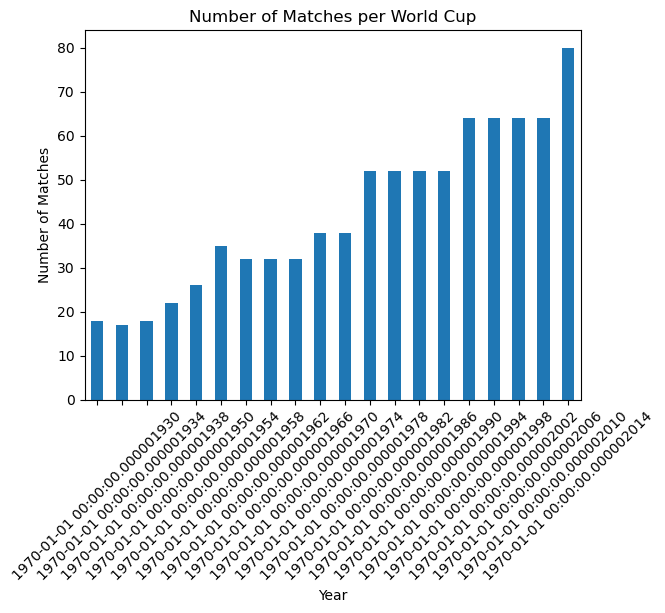

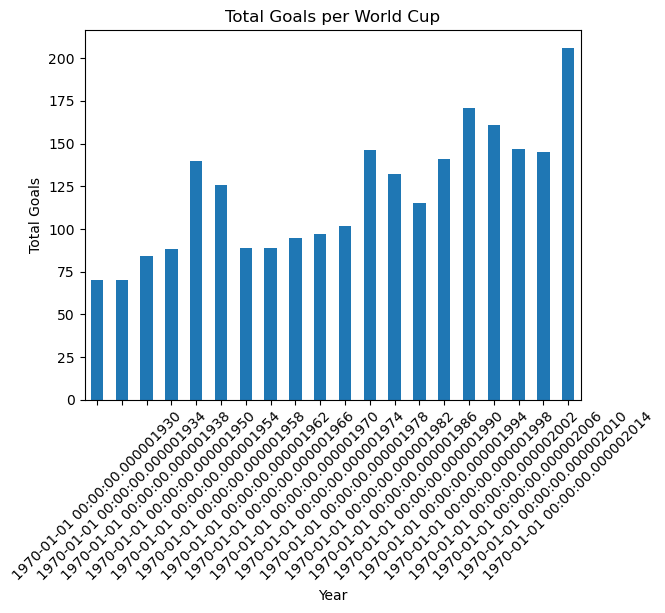

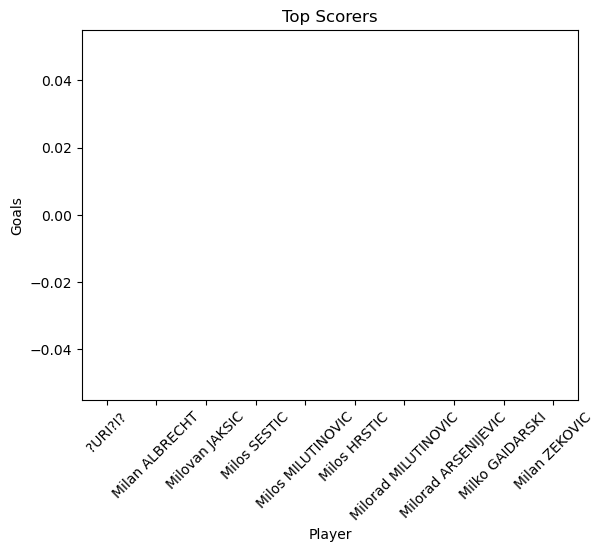

In [39]:
import matplotlib.pyplot as plt


# Plot number of matches per World Cup
matches_per_cup.plot(kind='bar', title='Number of Matches per World Cup')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

# Plot total goals per World Cup
total_goals_per_cup.plot(kind='bar', title='Total Goals per World Cup')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

 

# Creating a new column for goals if 'Event' column includes 'Goal'
players_df['Goals'] = players_df['Event'].apply(lambda x: 1 if x == 'Goal' else 0)

# Aggregating the goals by player
goals_by_players = players_df.groupby('Player Name')['Goals'].sum()

# Sorting and get top 10 scorers
top_scorers = goals_by_players.sort_values(ascending=False).head(10)

# Plot top scorers
top_scorers.plot(kind='bar', title='Top Scorers')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()






# Data Cleaning and Preparation

In [53]:
# Print column names to verify
print("Matches DataFrame columns:")
print(matches_df.columns)
print("\nPlayers DataFrame columns:")
print(players_df.columns)

# Convert 'Datetime' column to datetime format
if 'Datetime' in matches_df.columns:
    matches_df['Datetime'] = pd.to_datetime(matches_df['Datetime'], errors='coerce')

# Fill missing values
matches_df.fillna({
    'Home Team Goals': 0,
    'Away Team Goals': 0,
    'Attendance': 'Unknown'
}, inplace=True)

players_df.fillna({
    'Goals': 0,
    'Coach Name': 'Unknown'
}, inplace=True)

# Convert categorical columns
if 'Stage' in matches_df.columns:
    matches_df['Stage'] = matches_df['Stage'].astype('category')

if 'Team Initials' in players_df.columns:
    players_df['Team Initials'] = players_df['Team Initials'].astype('category')

# Convert 'Goals' to integer
if 'Goals' in players_df.columns:
    players_df['Goals'] = players_df['Goals'].astype(int)

# Remove duplicate rows
matches_df.drop_duplicates(inplace=True)
players_df.drop_duplicates(inplace=True)

# Print completion message
print("Data cleaning and conversion completed.")



Matches DataFrame columns:
Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

Players DataFrame columns:
Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event', 'Goals'],
      dtype='object')
Data cleaning and conversion completed.


# Feature Engineering

In [93]:
import numpy as np
# Calculate goal difference
matches_df['Goal Difference'] = matches_df['Home Team Goals'] - matches_df['Away Team Goals']

# Determine the winning team
matches_df['Winning Team'] = np.where(matches_df['Goal Difference'] > 0, matches_df['Home Team Name'],
                                      np.where(matches_df['Goal Difference'] < 0, matches_df['Away Team Name'], 'Draw'))

# Display the updated DataFrame to verify the new columns
print(matches_df[['Goal Difference', 'Winning Team']].head())

   Goal Difference Winning Team
0              3.0       France
1              3.0          USA
2              1.0   Yugoslavia
3              2.0      Romania
4              1.0    Argentina


# Advanced Aggregations

In [56]:
# Total goals scored by each team
home_goals = matches_df.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = matches_df.groupby('Away Team Name')['Away Team Goals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

print(total_goals)

# Winning percentage per team
total_matches = matches_df.groupby('Home Team Name').size() + matches_df.groupby('Away Team Name').size()
wins = matches_df[matches_df['Home Team Goals'] > matches_df['Away Team Goals']].groupby('Home Team Name').size()
wins += matches_df[matches_df['Away Team Goals'] > matches_df['Home Team Goals']].groupby('Away Team Name').size()
winning_percentage = (wins / total_matches).fillna(0) * 100

print(winning_percentage)


Brazil                     221.0
Argentina                  131.0
Germany FR                 131.0
Italy                      128.0
France                     106.0
                           ...  
Dutch East Indies            0.0
China PR                     0.0
Canada                       0.0
Zaire                        0.0
rn">Trinidad and Tobago      0.0
Length: 83, dtype: float64
Algeria                       23.076923
Angola                         0.000000
Argentina                     54.545455
Australia                      0.000000
Austria                       41.379310
                                ...    
rn">Bosnia and Herzegovina     0.000000
rn">Republic of Ireland        0.000000
rn">Serbia and Montenegro      0.000000
rn">Trinidad and Tobago        0.000000
rn">United Arab Emirates       0.000000
Length: 83, dtype: float64


# Ploting  the Number of World Cup Wins by Team"

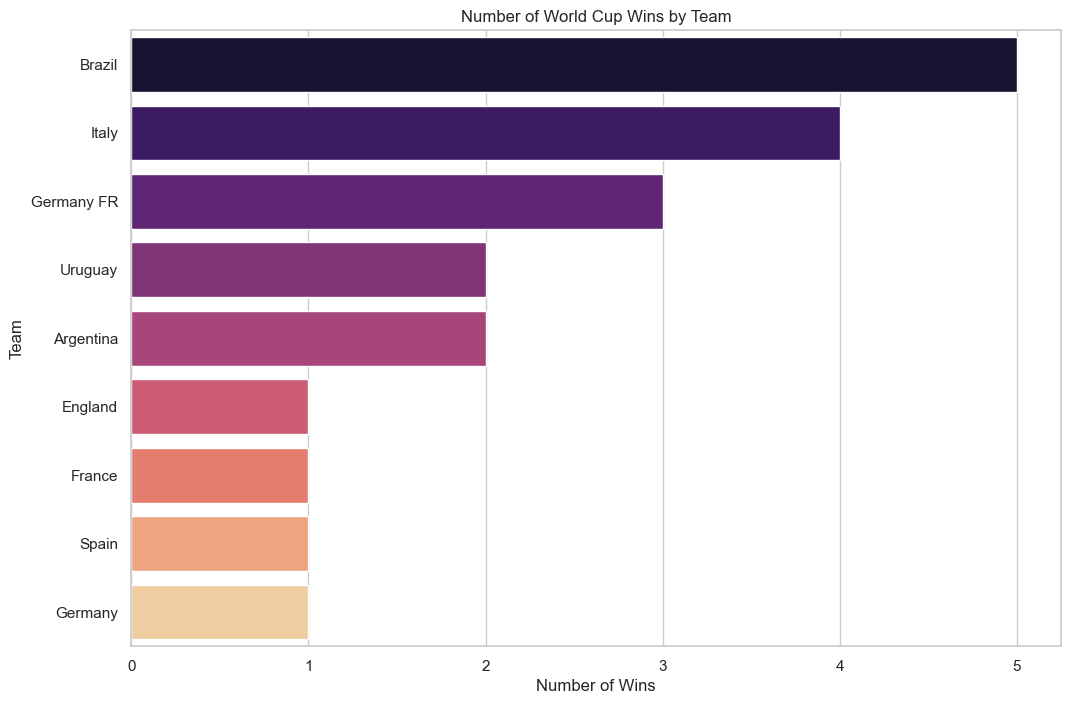

In [59]:
# Plot the number of wins per team
tournament_winners = cups_df['Winner'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=tournament_winners.values, y=tournament_winners.index, palette='magma')
plt.title('Number of World Cup Wins by Team')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

# Analyzing and Ploting the Distribution of Match Outcomes 

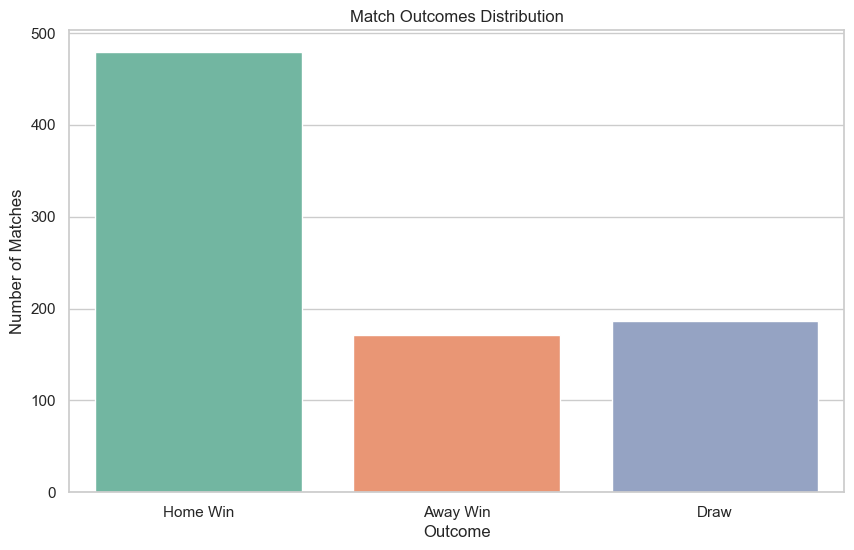

In [61]:
# Create new columns for match outcomes
matches_df['Home Win'] = matches_df['Home Team Goals'] > matches_df['Away Team Goals']
matches_df['Away Win'] = matches_df['Away Team Goals'] > matches_df['Home Team Goals']
matches_df['Draw'] = matches_df['Home Team Goals'] == matches_df['Away Team Goals']

# Melt the DataFrame to get match outcomes into a single column
melted_df = matches_df.melt(value_vars=['Home Win', 'Away Win', 'Draw'], var_name='Outcome Type', value_name='Outcome')

# Filter to keep only True outcomes
outcome_distribution = melted_df[melted_df['Outcome']]

# Plot match outcomes distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome Type', data=outcome_distribution, palette='Set2')
plt.title('Match Outcomes Distribution')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.xticks([0, 1, 2], ['Home Win', 'Away Win', 'Draw'])
plt.show()


# saving results

In [91]:
# Calculate the number of matches per World Cup
matches_per_cup = matches_df.groupby('Year')['MatchID'].count().reset_index()

# Rename columns for clarity
matches_per_cup.columns = ['Year', 'Number of Matches']

# Save the DataFrame to a CSV file
matches_per_cup.to_csv('matches_per_cup.csv', index=False)

print("DataFrame saved to 'matches_per_cup.csv'")

DataFrame saved to 'matches_per_cup.csv'
